# Exploring Linear Regression

In this task, your will explore linear regression.


In [11]:
#import the things we need
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

## Create Synthetic Data.
This returns X training data and y labels.  

* Experiment with the **`noise`** keyword argument to see how it affects the graph below, after you are done experimenting, set `noise=20`.
* Experiment with the **`random_state`** variable to get different sets of data

(30, 1) (30,)


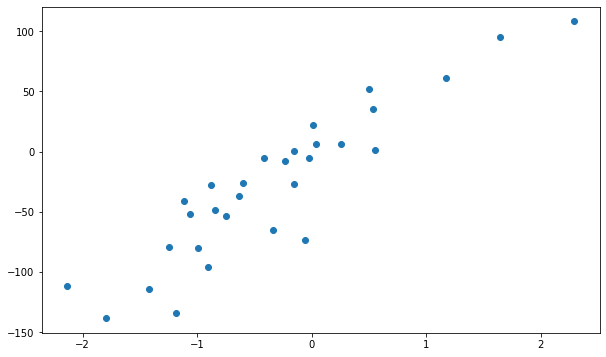

In [16]:
#np.random.seed(2)
X, y = make_regression(n_samples=30, n_features=1, noise = 20, random_state=2)
# X and y are of type ndarray
plt.figure(figsize=(10,6))
plt.scatter(X, y);
X[:5], y[:5] # why different shape?
print(X.shape, y.shape)
#print(X)

In [26]:
#create testing data to plot our prediction onto later - 
# this code is how we "plot a line !!" we need data to create the line
X_test = np.linspace(min(X),max(X),2) # why 100 points
#X_test = np.linspace(0,9,10) # why 100 points
X_test

array([[-2.1361961 ],
       [ 2.29220801]])

In [27]:
# code to plot your guess
def plot_your_guess (m , c):
    y_plot = m * X_test +c
    y_pred = m * X + c

    plt.figure(figsize=(10,6))
    plt.scatter(X,y)
    plt.plot(X_test.flatten(), y_plot, color = 'teal') # why is .flatten() needed in the code earlier
    plt.title("mean squared error: {0:.3g}".format(mean_squared_error(y_pred, y)));
    print(f"r2 score: {r2_score(y, y_pred)}")

# Let's plot your own personal guess for the best line

Fill out the `m` and `c` parameters for the above function and we'll plot it onto a graph, including checking its mean squared error.  We will later see how your eyes compare with the computers best guess

Feel free to use new code cells to create more plots


# TODO:
## I want to plot the cost function as well and show them how "where" we are on the cost function with each guess"


r2 score: -1.3455958773575767


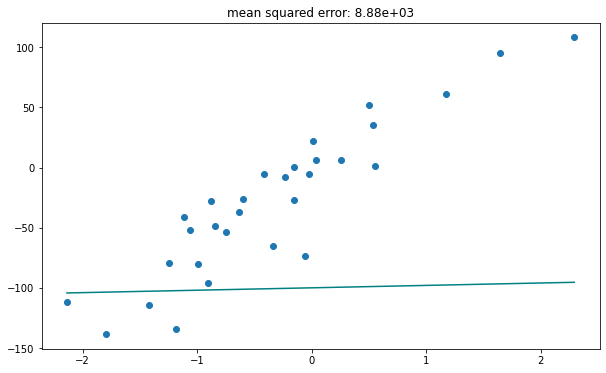

In [28]:
# You plug in m and c below
plot_your_guess(m = 2 , c = -100 )

r2 score: -1.1706884727717517


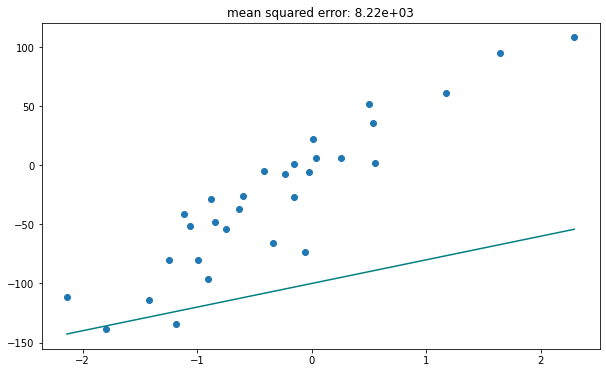

In [29]:
# make a few guesses, see if you can improve your mean squared error (small is better!)
plot_your_guess(m = 20 , c = -100  )

r2 score: 0.20258808980293053


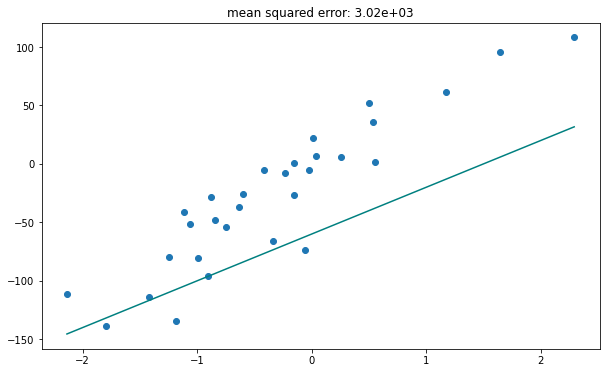

In [30]:
plot_your_guess(m = 40 , c = -60 )

r2 score: 0.7415412808388915


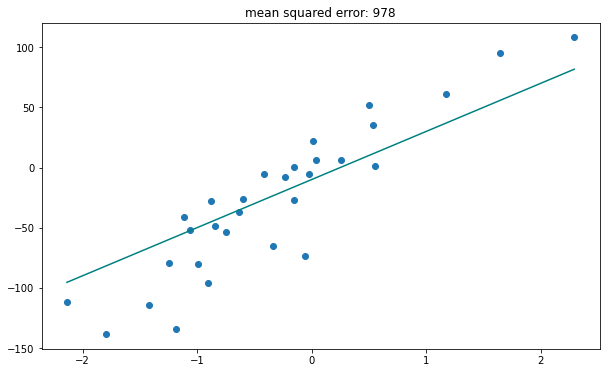

In [31]:
plot_your_guess(m = 40, c = -10  )

r2 score: 0.8142154195016634


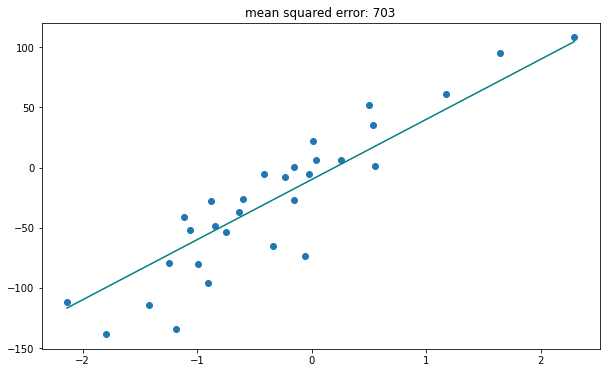

In [32]:
plot_your_guess(m = 50  , c = -10 )

# Linear Regression
Ok, now we'll let the computer "learn" for itself what the best line is.
We'll use the `LinearRegression` model from scikit-learn to do this.

LinearRegression will automatically find the coefficients and intercept terms that best fit the data point.  It will reduce the error as much as possible.

Let's create a linear regression model and fit it to our dataset.

In [34]:
whos ndarray

Variable   Type       Data/Info
-------------------------------
X          ndarray    30x1: 30 elems, type `float64`, 240 bytes
X_test     ndarray    2x1: 2 elems, type `float64`, 16 bytes
y          ndarray    30: 30 elems, type `float64`, 240 bytes


In [ ]:
X_test.flatten()

In [ ]:
X_test[:5]

In [57]:
from sklearn.linear_model import LinearRegression

def plot_linear():
    # y_pred's correspondence would be model.predict(X)
    model = LinearRegression()
    model.fit(X,y)
    print ("M :  {}, C : {}".format(model.coef_, model.intercept_))
    y_test = model.coef_ * X_test + model.intercept_
    #   y_test = model.predict(X_test.reshape(-1,1))
    y_pred = model.predict(X)

    plt.figure(figsize=(10,6))
    plt.scatter(X,y)
    plt.scatter(X_test, y_test, color="r")
    plt.plot(X_test, y_test)
    plt.title("mean squared error: {0:.3g}".format(mean_squared_error(y_pred, y)))
    print(f"r2 score: {r2_score(y, y_pred)}")
    temp = r2_score(y, model.predict(X).reshape(-1,1))
    print(temp, model.score(X, y))
    #model.score(X, y)

M :  [59.15592131], C : -8.259243452985114
r2 score: 0.8346490713262696
0.8346490713262696 0.8346490713262696


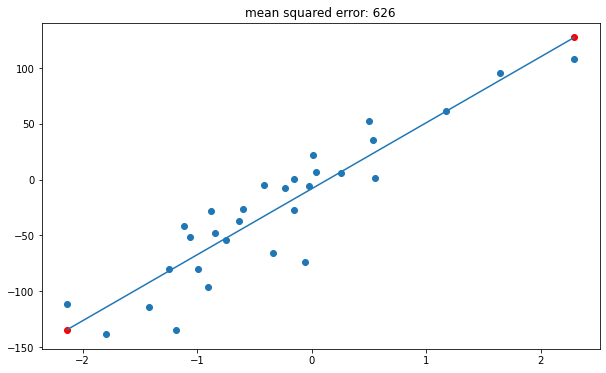

In [58]:
plot_linear()

##  How did your best eye guess compare to linear regression?
### The MSE of my best eye guess is 703 while the machine's is 626. Obviously the machine did better.

# Polynomial Regression

Now let's give our regression model more degrees of freedom.  Can we fit the data better?

How can you tell if the fit is better?

In [64]:
X_test_2 = np.linspace(min(X),max(X),100)

In [88]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def plot_poly(degree = 3):
    # make a pipeline that creates the polynomial features based on our input data
    # this is akin to using performing polynomial regression
    # see http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions
    #model = PolynomialFeatures(degree=degree, include_bias=True)
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                       ('linear', LinearRegression(fit_intercept=False))])
    model.fit(X,y)
    y_test = model.predict(X_test_2)
    y_pred = model.predict(X)
    #X_test_2.flatten().reshape(-1,1)
    plt.figure(figsize=(10,6))
    plt.scatter(X,y)
    plt.plot(X_test_2.flatten().reshape(-1,1), y_test, color = 'teal')
    plt.title("mean squared error: {0:.3g}".format(mean_squared_error(y_pred, y)))
    plt.ylim((min(y)-100,max(y)+100))
    print(f"r2 score: {r2_score(y, y_pred)}")
    #print(model.score(X, y_pred))
    print(model.steps[1][1].coef_)

### Try adjusting the degree of the polynomial regression.

What happens? 

r2 score: 0.875025192306463
[-4.77523962e+00  1.35392824e+02 -3.43238885e+02 -1.68214209e+03
  4.22970996e+03  1.45792208e+04 -6.90708937e+03 -4.33621599e+04
 -1.88212165e+04  3.41516514e+04  2.85550231e+04 -5.57133659e+03
 -1.09076645e+04 -1.51900691e+03  1.17839033e+03  3.09248864e+02]


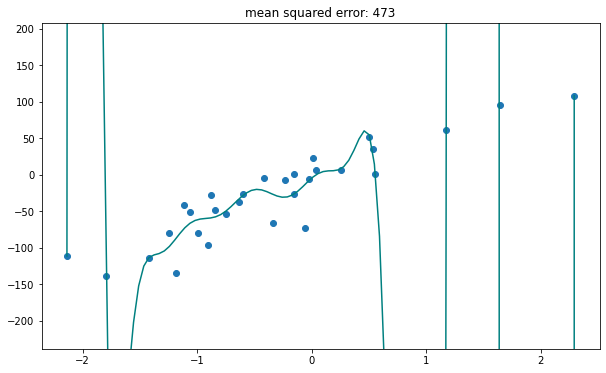

In [89]:
plot_poly(degree = 15)

r2 score: 0.8365576405200402
[-6.1940251  59.15674329 -2.03971639]


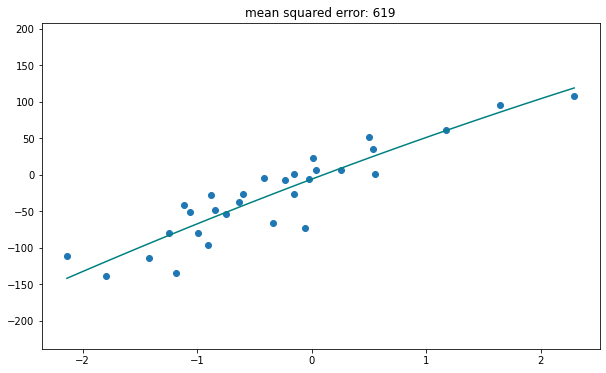

In [90]:
plot_poly(degree = 2)

In [ ]:
plot_poly(degree = 3)

In [ ]:
plot_poly(degree = 4)

In [ ]:
plot_poly(degree = 5)

In [ ]:
plot_poly(degree = 21)

In [ ]:
plot_poly(degree = 91)

## Imagine that your boss gave you these data-points as part of a housing dataset.

The task would be to find the function that best predicts new homes, that have never been sold before.

You can imagine that the x-axis is the size of the home, and the y-axis is the price of the home.  Just like I did in the class video.

Assuming this simple toy-world:
What degree of freedom would you choose for your final function?  Why?

**I think the degrees of freedom 3, 4, 5 have very low MSEs and yet account for all the points. Even though the higher DFs have lower MSEs, they seem to treat many points outside a continuous function**